# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

In [2]:
bb = pd.read_csv('baseball.csv')
bb.shape

(30, 17)

In [3]:
bb.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# feature description
1. target variable-: 1st column 'w'--> which is wins
2. rest of the dataframe is input variables
    * R ---> runs
    * AB ---> At Bats
    * H ---> Hits
    * 2B ---> Doubles
    * 3B ---> Triples
    * HR --> Homeruns
    * BB ---> walks
    * SO -->  strikeouts
    * SB --> Stolen Bases
    * RA --> Runs Allowed
    * ER---> Earned Runs
    * ERA ---> Earned run average
    * CG --> complete games
    * SHO ---> shutouts
    * SV ---> saves
    * E ---> Erros

In [4]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
bb.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
bb.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


## obs-:
1. the data is not scaled
2. for some variables std. is high
3. no variable is showing possible outliers present in it.
4. POSSIBLY skewed variables ['H', 'SO']

In [7]:
bb.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [8]:
for col in bb.columns:
    print('column name:', col)
    print(bb[col].unique())
    print('\n')

column name: W
[ 95  83  81  76  74  93  87  80  78  88  86  85  68 100  98  97  64  90
  71  67  63  92  84  79]


column name: R
[724 696 669 622 689 891 764 713 644 748 751 729 661 656 694 647 697 655
 640 683 703 613 573 626 667 720 650 737]


column name: AB
[5575 5467 5439 5533 5605 5509 5567 5485 5640 5511 5459 5417 5544 5600
 5484 5631 5491 5480 5571 5527 5428 5463 5420 5529 5385 5565 5649 5457
 5572]


column name: H
[1497 1349 1395 1381 1515 1480 1397 1370 1383 1495 1419 1363 1331 1379
 1405 1386 1462 1341 1378 1382 1351 1420 1361 1374 1346 1486 1494 1324
 1479]


column name: 2B
[300 277 303 260 289 308 272 246 278 294 279 243 262 288 292 274 257 295
 265 236 251 263]


column name: 3B
[42 44 29 27 49 17 19 20 32 33 26 21 22 46 39 30 34 13 40 18 37 48 36]


column name: HR
[139 156 141 136 151 232 212 217 167 161 172 230 176 198 146 137 140 171
 145 177 120 100 130 187 154 148 186]


column name: BB
[383 439 533 404 455 570 554 418 436 478 503 486 435 475 506 461 567 412
 49

### obs-:
1. problem is Linear Regression problem
2. we have to predict number of wins for each team given, so the values are continuous.

In [9]:
bb.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [10]:
bb.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

### obs-:
1. 'R' column has skewness 
2. all the columns are low to moderate skewed

## EDA

<AxesSubplot:>

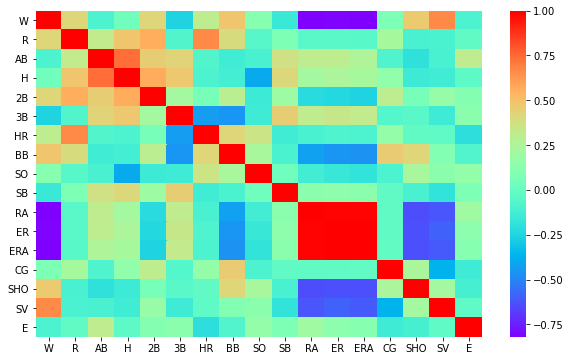

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(bb.corr(), cmap = 'rainbow')

### obs-:
1. columns ['R', 'ER', 'ERA'] are negatively correlated with the output variable, and can effect the model performance.
2. these variables have negative correlation with other variables also like SHO, SV

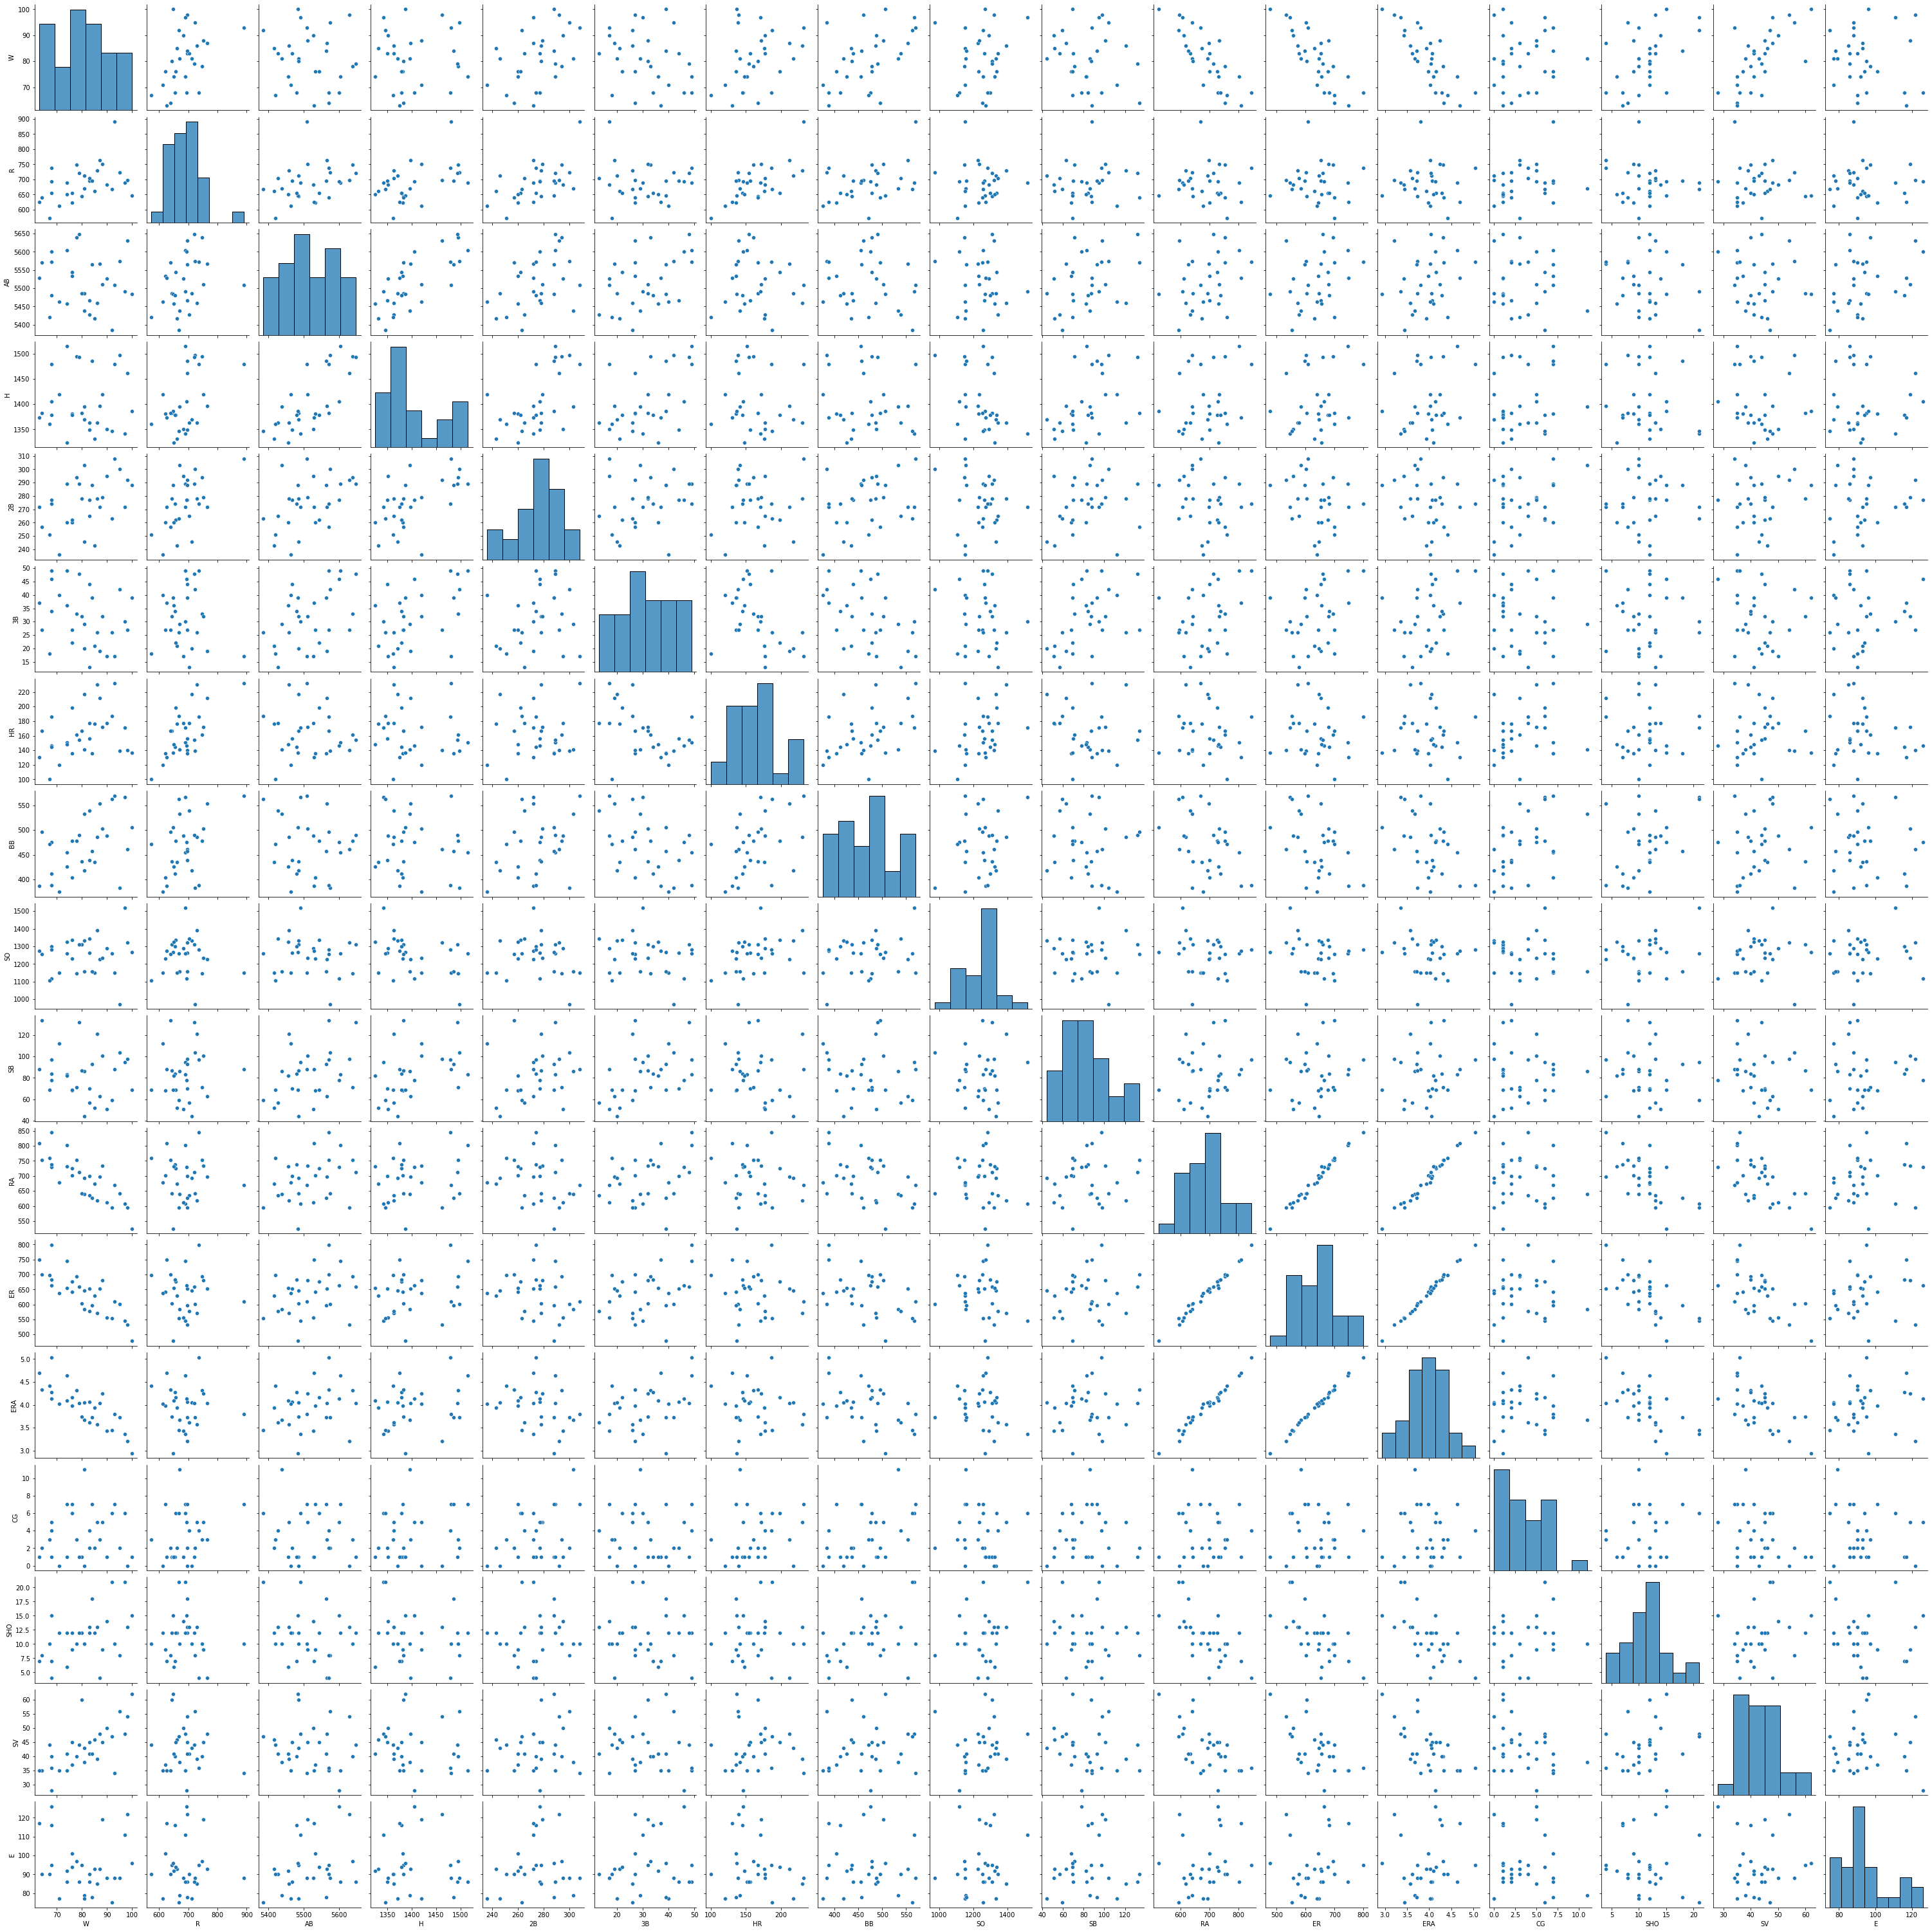

In [12]:
sns.pairplot(bb)

### obs-:
1. columns ['R', '2B', 'HR', 'BB', 'SV'] is showing some positive regression
2. rest for all columns matched with wins, the data is dispersed and not much helpful
3. columns['ER','R', 'ERA'] have negative regression with predictor, but positive regression amongst themselves with each other.

<Figure size 432x288 with 0 Axes>

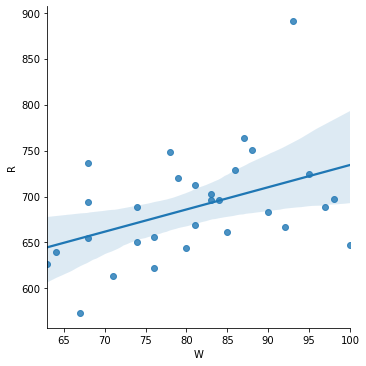

<Figure size 432x288 with 0 Axes>

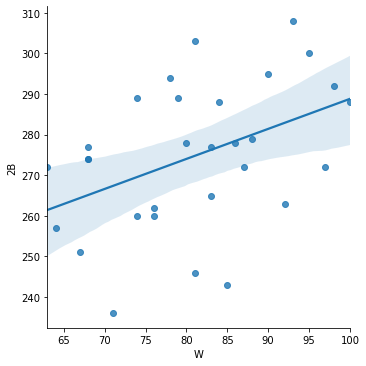

<Figure size 432x288 with 0 Axes>

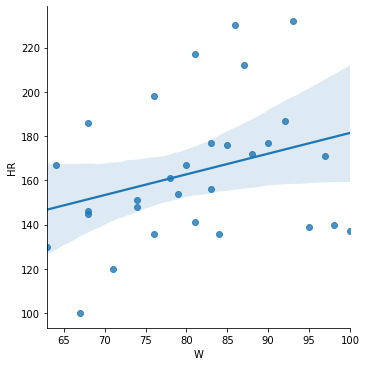

<Figure size 432x288 with 0 Axes>

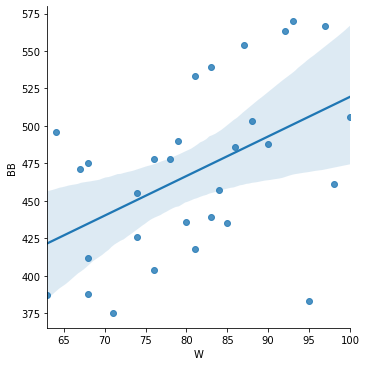

<Figure size 432x288 with 0 Axes>

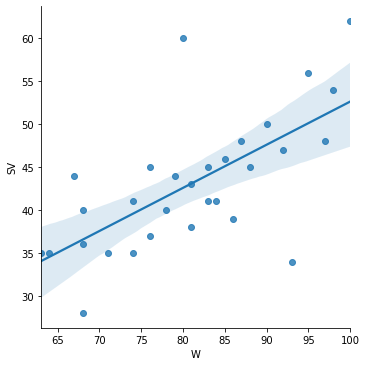

In [13]:
cols = bb[['R', '2B', 'HR', 'BB', 'SV']]
for i in cols:
    plt.figure()
    sns.lmplot(x = 'W', y= i, data = bb)

#### almost they all have a positive regression with the predictor 'w'

<Figure size 432x288 with 0 Axes>

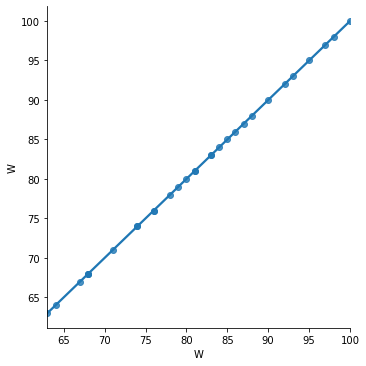

<Figure size 432x288 with 0 Axes>

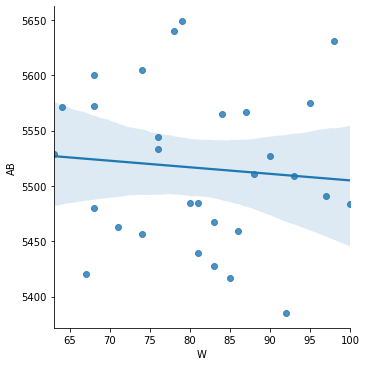

<Figure size 432x288 with 0 Axes>

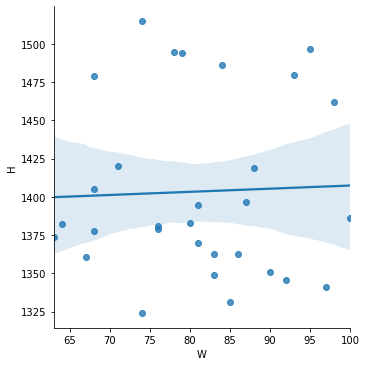

<Figure size 432x288 with 0 Axes>

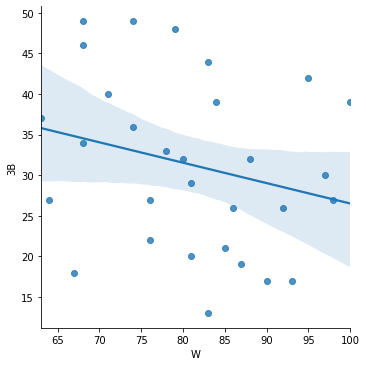

<Figure size 432x288 with 0 Axes>

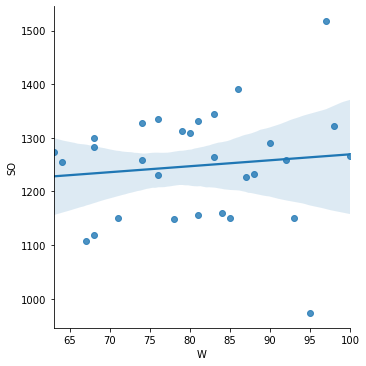

<Figure size 432x288 with 0 Axes>

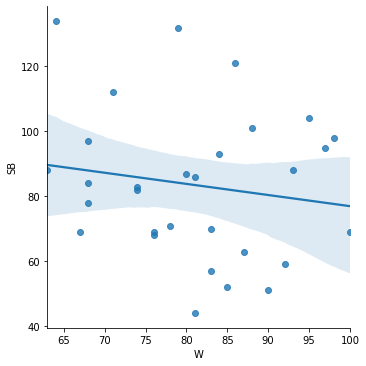

<Figure size 432x288 with 0 Axes>

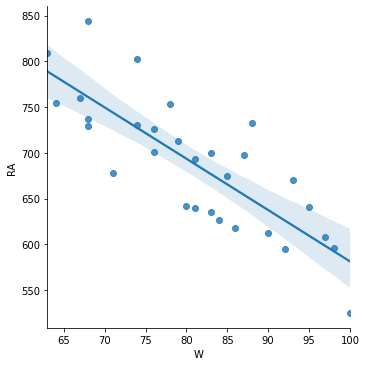

<Figure size 432x288 with 0 Axes>

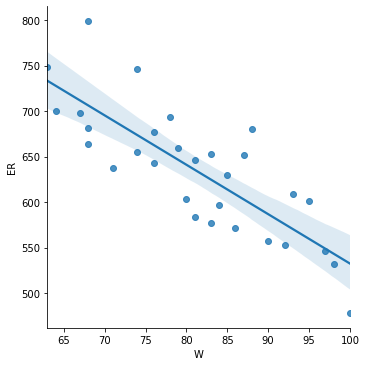

<Figure size 432x288 with 0 Axes>

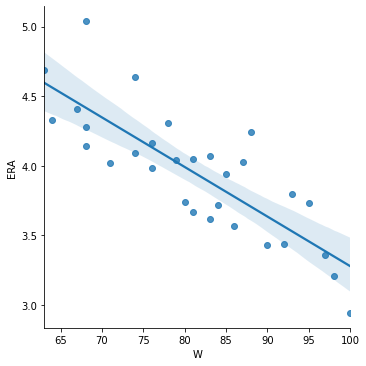

<Figure size 432x288 with 0 Axes>

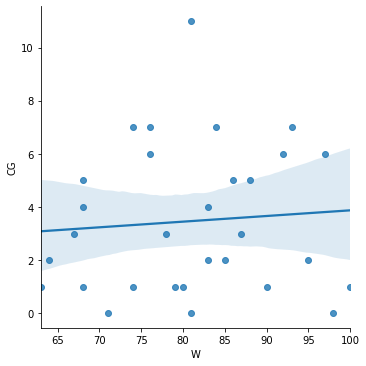

<Figure size 432x288 with 0 Axes>

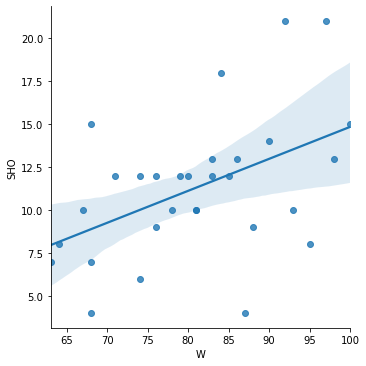

<Figure size 432x288 with 0 Axes>

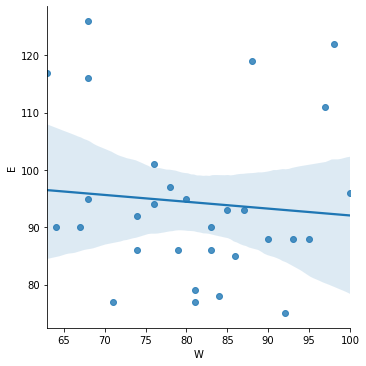

In [14]:
cols = bb.drop(['R', '2B', 'HR', 'BB', 'SV'], axis = 1)
for i in cols:
    plt.figure()
    sns.lmplot(x = 'W', y= i, data = bb)

#### we have 'SHO' is also in the list which have positive regression with the predictor 'W'

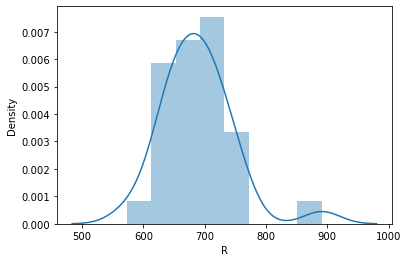

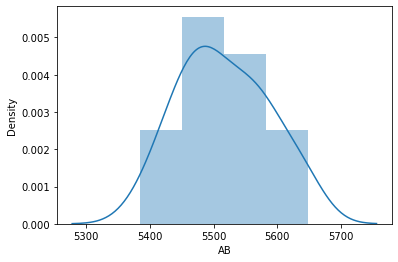

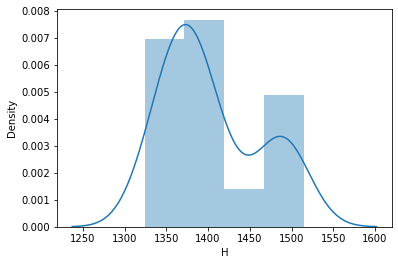

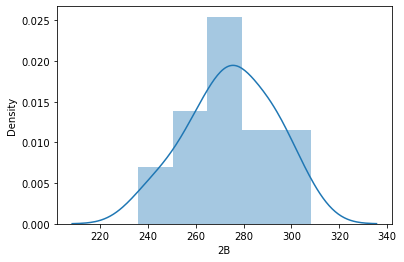

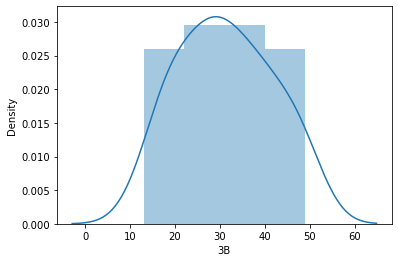

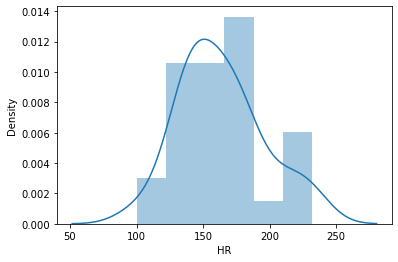

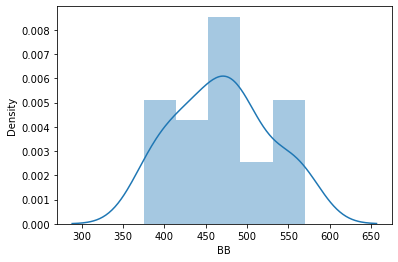

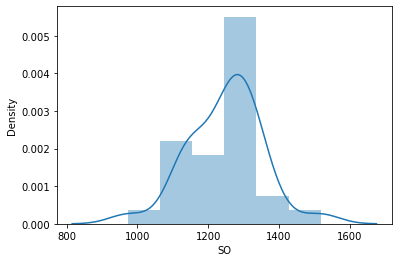

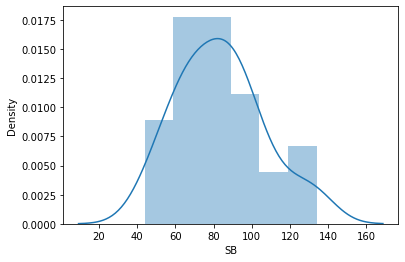

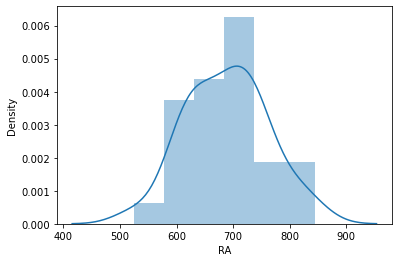

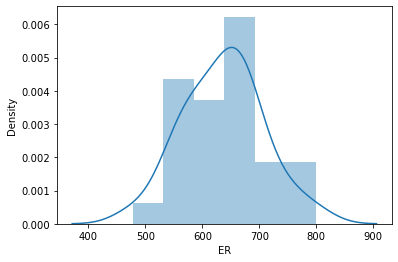

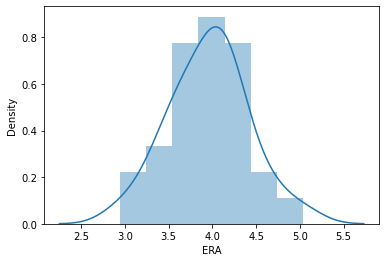

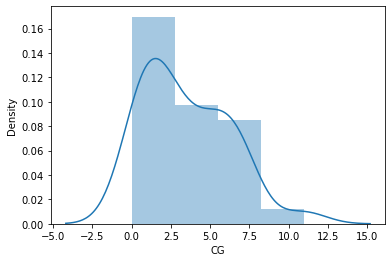

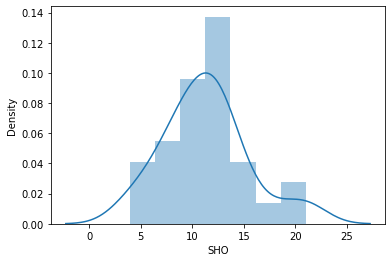

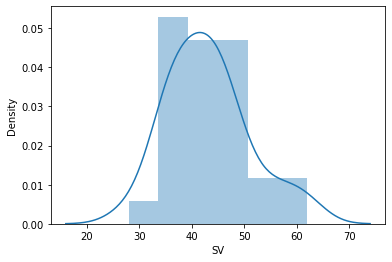

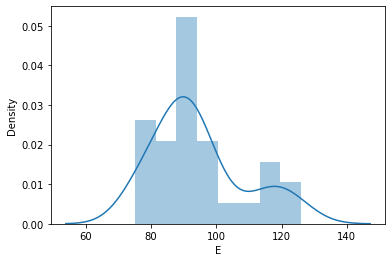

In [15]:
cols = bb.drop('W', axis = 1)
for i in cols:
    plt.figure()
    sns.distplot(bb[i])

### OBS-:
1. columns [ 'R', 'H', 'CG', 'E'] requires transformation

<Figure size 432x288 with 0 Axes>

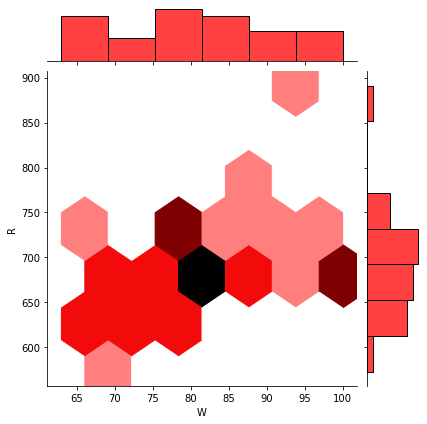

<Figure size 432x288 with 0 Axes>

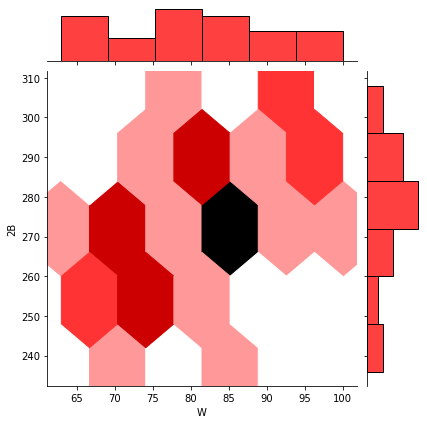

<Figure size 432x288 with 0 Axes>

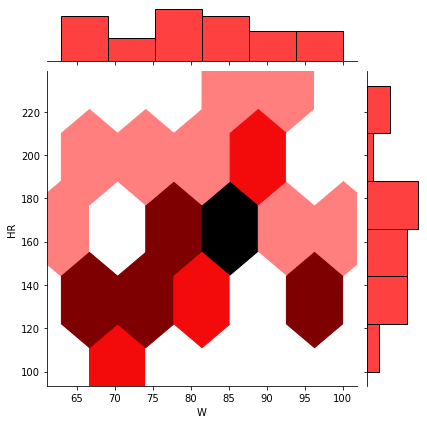

<Figure size 432x288 with 0 Axes>

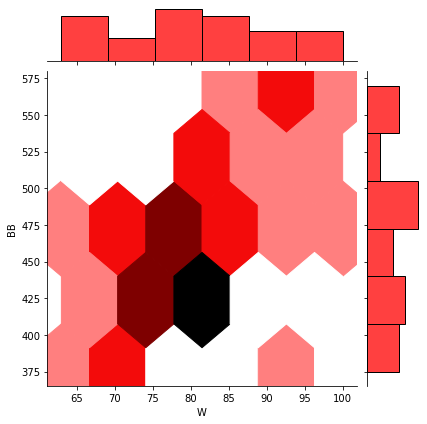

<Figure size 432x288 with 0 Axes>

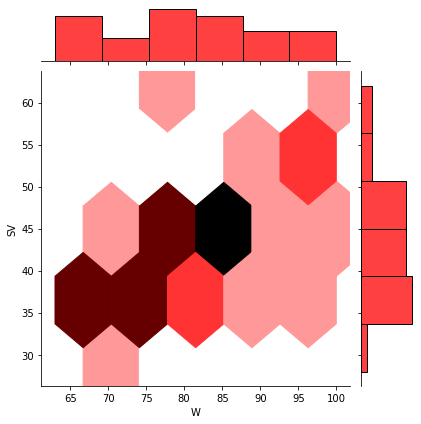

In [16]:
cols = bb[['R', '2B', 'HR', 'BB', 'SV']]
for i in cols:
    plt.figure()
    sns.jointplot(x = 'W', y= i, data = bb, kind = 'hex', color = 'red')

### obs-:
1. 'R' have major density between 500-800 with wins between 60-110.
2. more the '2B' (doubles) more the wins
3. more teams have on an avg. 150 homeruns with 80 avg. wins.
4. In a range of 400-450 walks have 80-85 wins for number of teams
5. In a range of 40-50 saves have 85 avg. wins for number of teams.

<AxesSubplot:>

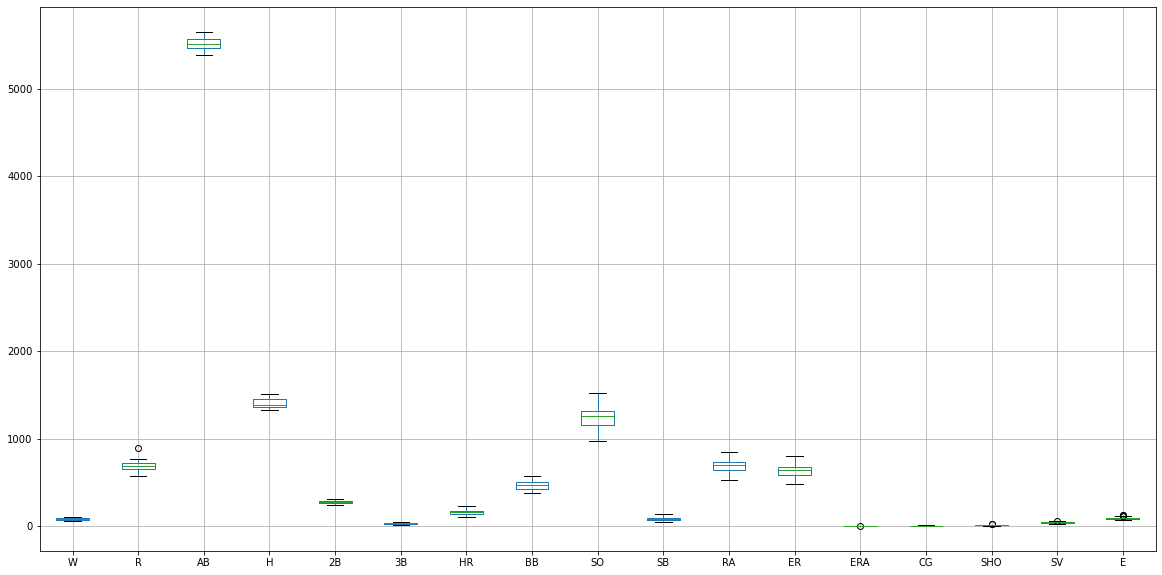

In [17]:
plt.figure(figsize=(20,10))
bb.boxplot()

<AxesSubplot:>

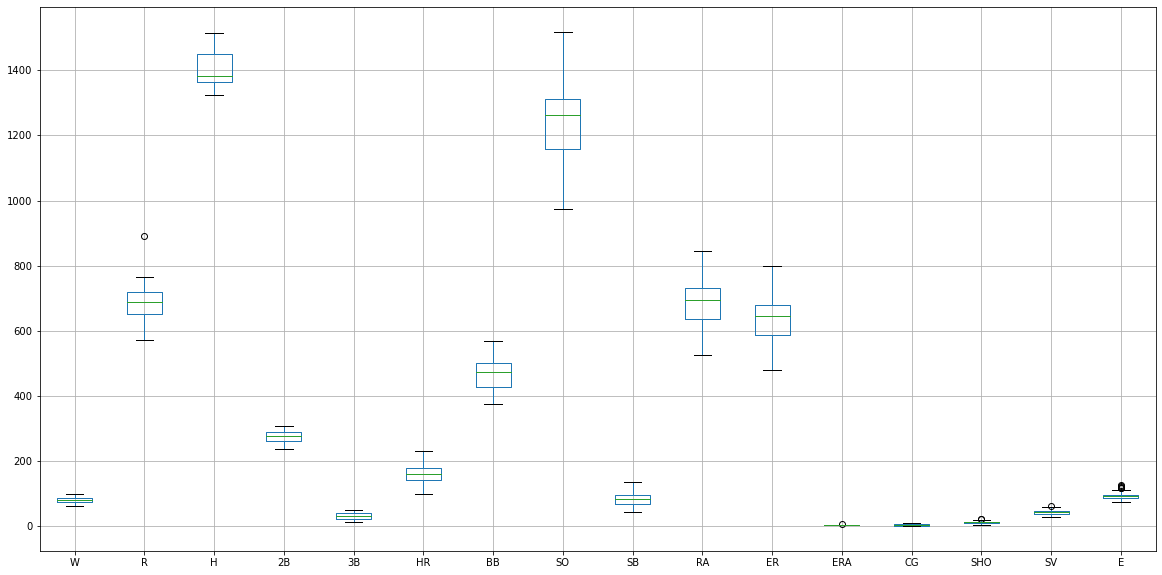

In [18]:
plt.figure(figsize=(20,10))
bb.drop('AB', axis =1).boxplot()

### Obs-:
1. almost no outliers are present except we can see one in 'R'(runs) columns which is self explanatory that more or high runs can be scored by a team.


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
scaler.fit(bb.drop('W', axis =1))

StandardScaler()

In [21]:
scaled_features = scaler.transform(bb.drop('W', axis =1))
scaled_features

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.5398062 , -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.5398062 ,  0.1728    ,  0.24987932,
        -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  2.77264091, -0.32091429, -0.65485616,
        -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.3004422 , -0.56777144, -0.78410408,
         0.48575751],
       [ 0.01327008,  1.28073815,  1

In [22]:
bb_feature_scl = pd.DataFrame(scaled_features, columns = bb.columns[1:])

In [23]:
bb_feature_scl

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.814629,1.671607,-0.461470
1,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.172800,0.249879,-0.607197
2,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
3,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.567771,-0.784104,0.485758
4,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,-1.042600,-0.607197
5,3.509647,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.300442,-0.320914,-1.171848,-0.461470
6,1.311430,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,-0.171757,-1.802057,0.637623,-0.097152
7,0.428681,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.275906,-0.320914,-0.008617,-1.262970
8,-0.765626,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.907856,0.172800,2.188598,0.048576
9,1.034489,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,-0.171757,-0.320914,-0.396360,0.194303


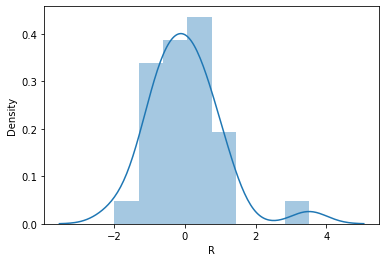

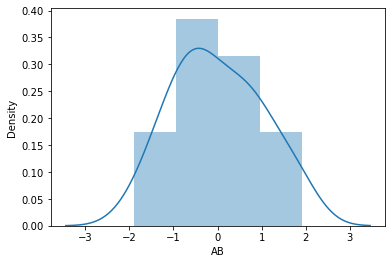

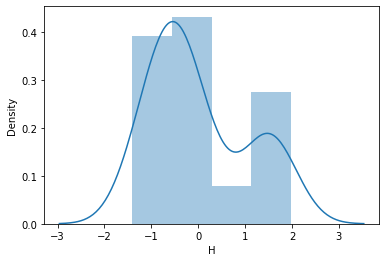

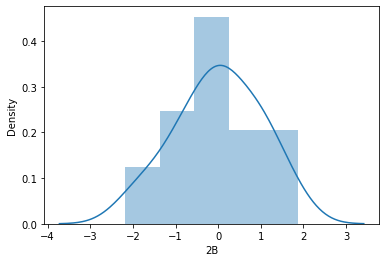

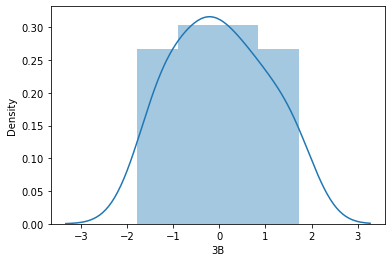

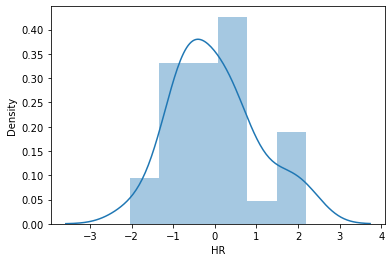

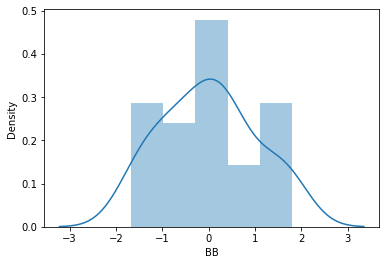

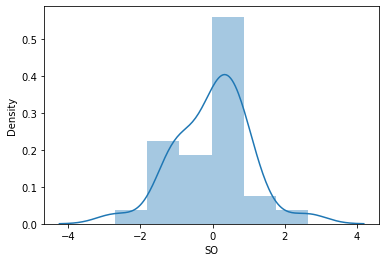

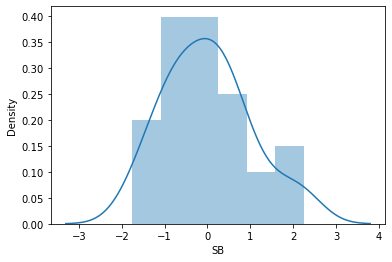

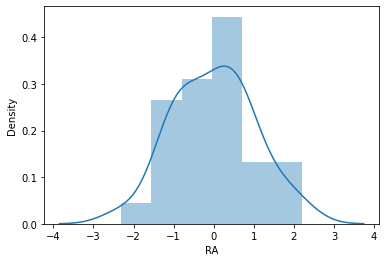

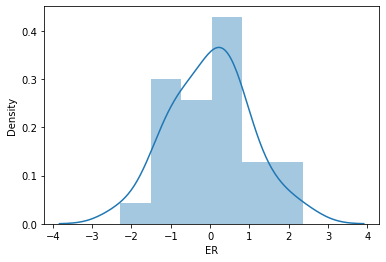

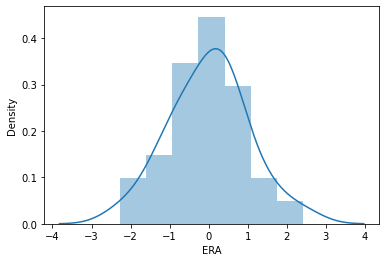

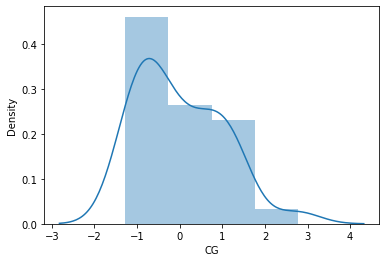

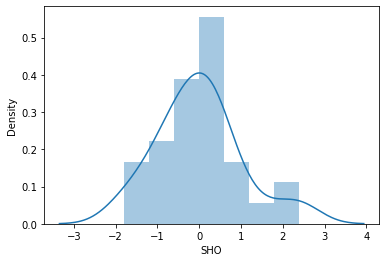

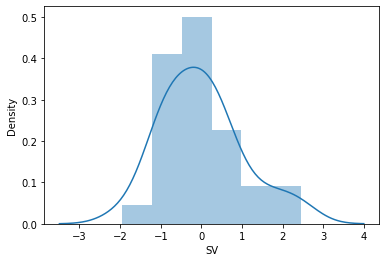

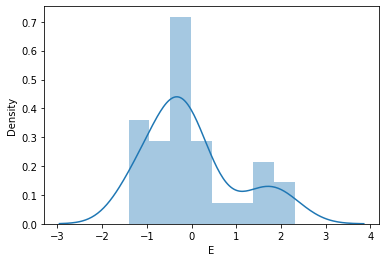

In [24]:
cols = bb_feature_scl
for i in cols:
    plt.figure()
    sns.distplot(bb_feature_scl[i])

In [25]:
from scipy.stats import zscore
z = np.abs(zscore(bb_feature_scl))
z

array([[0.61907797, 0.84773126, 1.66368512, 1.42017307, 1.04119304,
        0.7872986 , 1.53490242, 2.69762957, 0.91388329, 0.66623393,
        0.50511008, 0.50695519, 0.5398062 , 0.81462859, 1.67160651,
        0.46146963],
       [0.13443166, 0.71109353, 0.97068076, 0.12740339, 1.23580856,
        0.24396668, 0.5365919 , 0.15487844, 0.60182558, 0.16597077,
        0.24892985, 0.25459752, 0.5398062 , 0.1728    , 0.24987932,
        0.60719689],
       [0.33290586, 1.1152333 , 0.15189137, 1.58879521, 0.22380785,
        0.7233772 , 1.13914361, 0.89398189, 0.11144918, 0.68033909,
        0.75162313, 0.64134684, 2.77264091, 0.32091429, 0.65485616,
        1.11724227],
       [1.14641931, 0.24152162, 0.40108814, 0.82812203, 0.41842337,
        0.8831807 , 1.16053598, 0.16860185, 0.69098493, 0.18007593,
        0.10392217, 0.05301004, 1.3004422 , 0.56777144, 0.78410408,
        0.48575751],
       [0.01327008, 1.28073815, 1.98408098, 0.80189192, 1.72234737,
        0.40377019, 0.25136033, 

In [26]:
print(np.where(z>3))

(array([5], dtype=int64), array([0], dtype=int64))


In [27]:
z[5][0]

3.509647044719306

In [28]:
bb_features = bb_feature_scl[(z<3).all(axis =1)]

<AxesSubplot:>

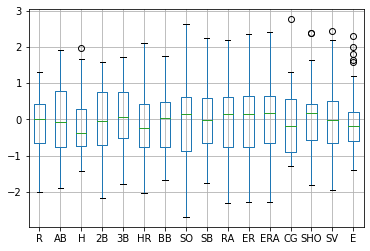

In [29]:
bb_features.boxplot()

In [30]:
X = bb_features
y = bb['W'].drop(5, axis = 0 )

In [31]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.814629,1.671607,-0.461470
1,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.172800,0.249879,-0.607197
2,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
3,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.567771,-0.784104,0.485758
4,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,-1.042600,-0.607197


In [32]:
X.shape

(29, 16)

In [33]:
y.shape

(29,)

## Model training

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=55)

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predlm = lm.predict(X_test)

In [37]:
lm.coef_

array([  5.99265714,  -4.96449126,   4.57279933,  -0.16940986,
        -0.83577536,  -4.50064811,   2.23669581,   5.31378556,
        -3.53577683, -13.37187244,  34.93326201, -29.45814769,
        -0.7332233 ,  -1.73227552,  -1.48022157,   0.64331337])

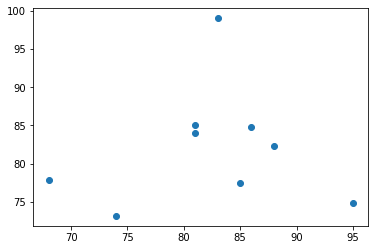

In [38]:
plt.scatter(y_test,predlm)

### model evaluation

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MAE: ', mean_absolute_error(y_test,predlm))
print('MSE: ', mean_squared_error(y_test,predlm))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,predlm)))
print('\n')
print('R2 SCORE: ', r2_score(y_test, predlm))

MAE:  7.584885816346694
MSE:  97.3124929137424
RMSE:  9.864709469302296


R2 SCORE:  -0.7801065776904097


<AxesSubplot:xlabel='W', ylabel='Density'>

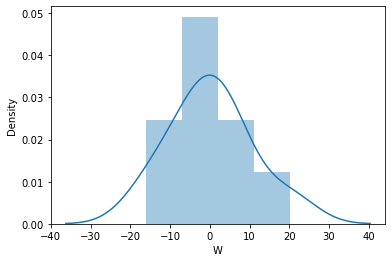

In [40]:
# plotting residuals
sns.distplot(y_test-predlm)

#### residuals are normally distributed

In [41]:
coeff_df = pd.DataFrame(lm.coef_,X.columns, columns=['Coeffecient'])
coeff_df

,Coeffecient
R,5.992657
AB,-4.964491
H,4.572799
2B,-0.169410
3B,-0.835775
HR,-4.500648
BB,2.236696
SO,5.313786
SB,-3.535777
RA,-13.371872


## hence we were not getting the desired result by scaling the data, lets see if it works for unscaled data.

In [42]:
bb.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [43]:
z = np.abs(zscore(bb))

In [44]:
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [45]:
bb_new = bb[(z<3).all(axis =1)]

In [46]:
bb_new.shape

(29, 17)

In [47]:
x = bb_new.drop('W', axis = 1)
y = bb_new ['W']

In [48]:
x.shape

(29, 16)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=55)

In [50]:
lm = LinearRegression()
lm.fit(x_train,y_train)
print('model score: ', lm.score(x_train,y_train))
predlm = lm.predict(x_test)

print('\n')
print('MAE: ', mean_absolute_error(y_test,predlm))
print('MSE: ', mean_squared_error(y_test, predlm))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predlm)))
print('r2 score: ', r2_score(y_test,predlm))

model score:  0.9913444843069792


MAE:  6.70431031661376
MSE:  75.20239487262845
RMSE:  8.671931438418344
r2 score:  -0.3801136882479068


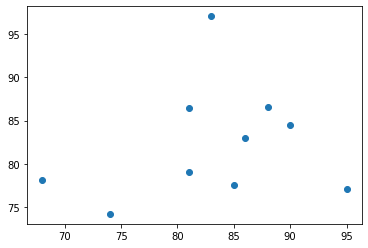

In [51]:
plt.scatter(y_test,predlm)

In [52]:
lm.coef_

array([ 1.18511490e-01, -1.05073483e-01,  9.82281124e-02, -4.54503690e-02,
       -1.35945894e-02, -1.65952165e-01,  4.74151740e-02,  4.60596731e-02,
       -1.34729764e-01, -2.00149473e-01,  7.79882112e-01, -1.05997094e+02,
        1.36739201e-02, -5.61548972e-01, -1.41855390e-01,  1.09166101e-01])

<AxesSubplot:xlabel='W', ylabel='Density'>

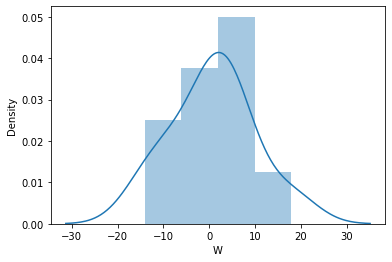

In [53]:
sns.distplot(y_test-predlm)

In [54]:
coeff_df = pd.DataFrame(lm.coef_,x.columns, columns=['Coeffecient'])
coeff_df

,Coeffecient
R,0.118511
AB,-0.105073
H,0.098228
2B,-0.045450
3B,-0.013595
HR,-0.165952
BB,0.047415
SO,0.046060
SB,-0.134730
RA,-0.200149


<AxesSubplot:title={'center':'Model Coefficients'}>

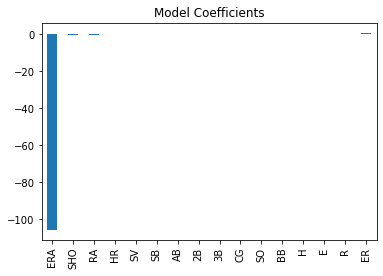

In [55]:
coef = pd.Series(lm.coef_,x.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

In [56]:
x2 = bb_new.drop(['W','ERA'], axis = 1)

In [57]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y, test_size=0.33, random_state=55)

In [58]:
from sklearn.model_selection import cross_val_score
lm.fit(x_train2,y_train2)
pred = lm.predict(x_test2)

print('Model Report')
print('MSE: ', mean_squared_error(pred,y_test2))
print('R2 SCORE:', r2_score(pred,y_test2))
cv=cross_val_score(lm, x, y, cv=5)
print(cv)
print('CV SCORE: ', cv.mean())

Model Report
MSE:  106.25992982806194
R2 SCORE: -0.43557258683457745
[ 0.7557458  -0.67830114  0.66816769 -0.25396453 -0.30350451]
CV SCORE:  0.0376286604965234


<AxesSubplot:title={'center':'Model Coefficients'}>

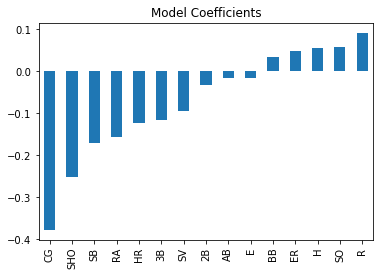

In [59]:
coef = pd.Series(lm.coef_,x2.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

MODEL SCORE: 0.983228534781102
Model Report
MSE:  70.23416354021737
R2 SCORE: -0.17235409076169605
[ 0.46555169 -1.31632031  0.57244268  0.72515764  0.81413785]
CV SCORE:  0.2521939086758537


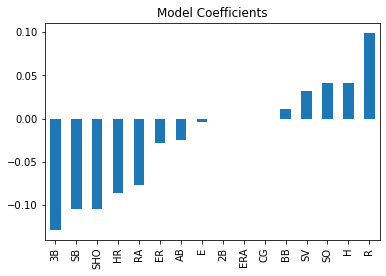

In [60]:
from sklearn.linear_model import Lasso, Ridge

ls = Lasso()
ls.fit(x_train,y_train)
print ('MODEL SCORE:',ls.score(x_train,y_train))
predls = ls.predict(x_test)
coef = pd.Series(ls.coef_,x.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

print('Model Report')
print('MSE: ', mean_squared_error(predls,y_test))
print('R2 SCORE:', r2_score(predls,y_test))
cv=cross_val_score(ls, x, y, cv=5)
print(cv)
print('CV SCORE: ', cv.mean())

### obs-:
1. we can actually see that in both the models the 5 variable are to the positive side to make the model predictions better. 
2. majority of variables are to highly negative side therefore they are detoriating the model performance.

In [61]:
x = bb_new[['BB','SV','SO','H','R']]
y = bb_new['W']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=57)

In [63]:
x_train.shape

(19, 5)

MODEL SCORE: 0.7888842613428646
Model Report
MSE:  59.0829027774573
R2 SCORE: 0.47990402484632655
[ 0.02506079 -3.15894952  0.42510338  0.46149465  0.39836631]
CV SCORE:  -0.36978487839438784


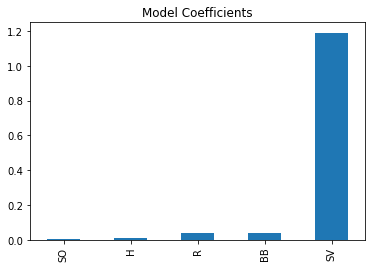

In [64]:
from sklearn.linear_model import Lasso, Ridge

ls = Lasso()
ls.fit(x_train,y_train)
print ('MODEL SCORE:',ls.score(x_train,y_train))
predls = ls.predict(x_test)
coef = pd.Series(ls.coef_,x.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

print('Model Report')
print('MSE: ', mean_squared_error(y_test, predls))
print('R2 SCORE:', r2_score(y_test,predls))
cv=cross_val_score(ls, x, y, cv=5)
print(cv)
print('CV SCORE: ', cv.mean())

Model score: 0.7892437734774972
model Report
MSE:  62.928414453819734
R2 score:  0.4460526896670798
[ 5.40708940e-04 -3.28974981e+00  4.52973608e-01  4.75143800e-01
  4.06207971e-01]
cv score:  -0.39097674431148954


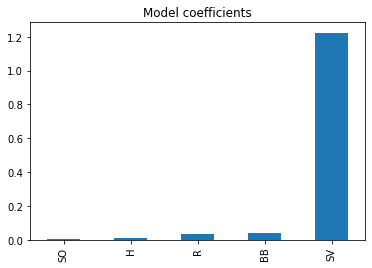

In [65]:
rd = Ridge()
rd.fit(x_train,y_train)
print('Model score:', rd.score(x_train,y_train))
predrd = rd.predict(x_test)
coef = pd.Series(rd.coef_, x.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model coefficients')

print('model Report')
print('MSE: ', mean_squared_error(y_test, predrd))
print('R2 score: ', r2_score(y_test,predrd))
cv = cross_val_score(rd,x,y,cv=5)
print(cv)
print('cv score: ', cv.mean())

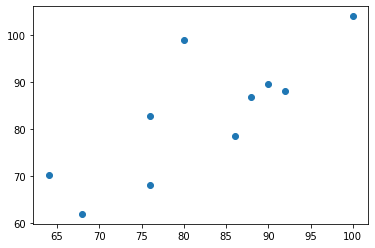

In [66]:
plt.scatter(y_test,predrd)

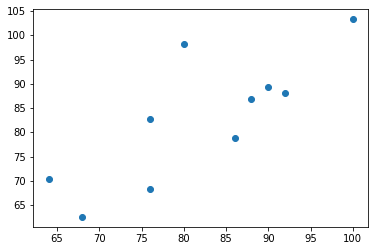

In [67]:
plt.scatter(y_test,predls)

### since we are not getting the desired result due to variance in componenets, by any of the models trained we are using PCA for actually knowing the required features or components to reduce dimensionality and get to know that how many features actually giving the best predicted model.

In [68]:
from sklearn.decomposition import PCA
pca = PCA()

In [69]:
p_comp = pca.fit_transform(bb_feature_scl)

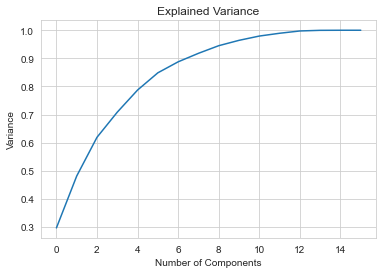

In [70]:
sns.set_style('whitegrid')
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Explained Variance')
plt.show()

### we can see that about 12 components or features using 100% data. 
so we can reduce the number of columns i.e. from 16 to 12 by loosing no data, which actually can helpful in reducing dimensions and givng us better model.

In [71]:
pca = PCA(n_components=12)
new_data = pca.fit_transform(bb_feature_scl)

bb_prnc_feat = pd.DataFrame(new_data, columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12'])
bb_prnc_feat

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12
0,0.867413,2.122345,-2.894358,0.669670,-2.731243,0.147389,0.635840,0.321777,-0.462272,-0.020176,-0.732738,0.145333
1,0.130337,-0.870952,-0.351691,0.134231,-0.211433,0.468177,-0.904620,0.929330,-0.852782,-0.625750,0.615142,0.210456
2,-1.311442,1.177871,0.666544,2.976226,0.312964,-0.639481,1.136171,1.596495,0.234307,0.653205,0.387795,0.284388
3,0.765362,-1.377492,-0.051721,0.950416,0.423381,-1.075740,0.063431,-0.105279,0.028011,1.593964,-0.540106,0.415591
4,3.323426,1.681766,0.273832,1.260491,0.864381,0.260109,-1.708900,0.463959,0.672309,0.110339,0.065684,-0.237473
5,-0.923627,4.086316,3.319173,0.318585,-1.168070,-0.190317,0.960672,-0.395233,-0.801111,-0.167729,0.314109,-0.605618
6,-0.290468,0.738750,2.201384,-1.446595,-1.693805,-0.599754,0.338534,0.008548,0.856549,-0.427661,-0.060139,0.954141
7,-0.593708,-1.961116,1.796415,-1.146524,-1.658562,1.107181,-1.327971,-0.739914,-0.320259,0.534286,0.051121,-0.067460
8,-1.324598,-0.735104,-1.534594,-1.140173,-0.529206,0.467598,-0.210044,0.943309,0.293857,-0.171844,-0.675044,-0.235321
9,2.062331,2.069248,0.209600,-0.094183,-0.944075,-0.922906,-0.794728,-0.670389,0.536733,-0.138445,0.416838,-0.119349


In [72]:
y = bb['W']
X_train, X_test, y_train, y_test = train_test_split(bb_prnc_feat, y, test_size=0.30, random_state=57)

In [73]:
lm.fit(X_train,y_train)
print(lm.score(X_train,y_train))

0.9531026485673312


In [74]:
predlm = lm.predict(X_test)

<AxesSubplot:title={'center':'Model Coefficients'}>

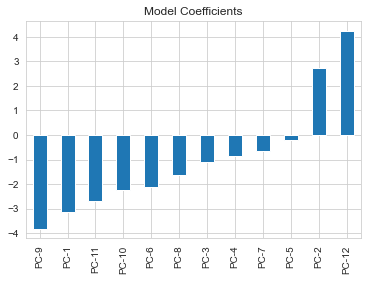

In [75]:
coef = pd.Series(lm.coef_,bb_prnc_feat.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

In [76]:
print('Model Report')
print('MSE: ', mean_squared_error(predlm,y_test))
print('R2 SCORE:', r2_score(predlm,y_test))
cv=cross_val_score(lm, bb_prnc_feat, y, cv=5)
print(cv)
print('CV SCORE: ', cv.mean())

Model Report
MSE:  87.61833956692914
R2 SCORE: -0.37611622955136426
[ 0.36733476 -2.2682406   0.32728607  0.81604638  0.82787862]
CV SCORE:  0.014061047872530241


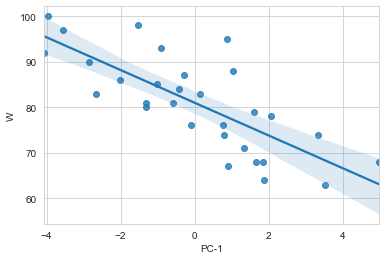

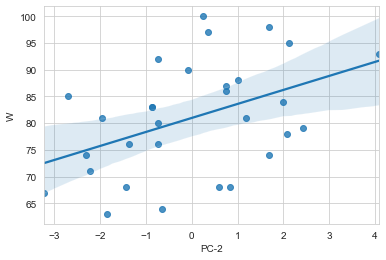

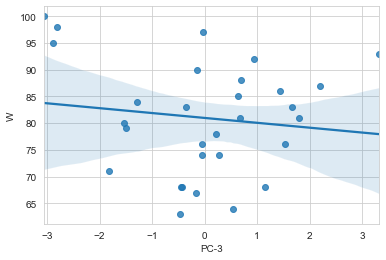

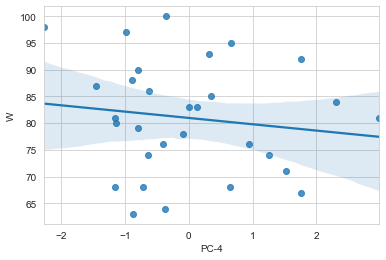

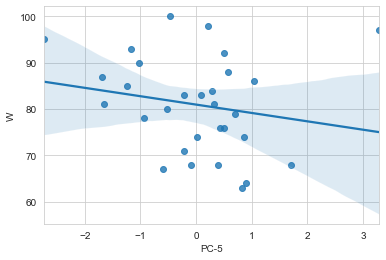

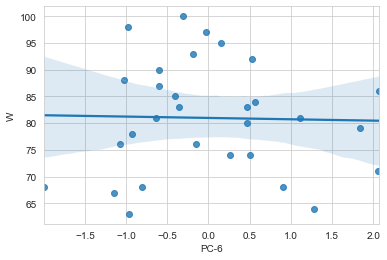

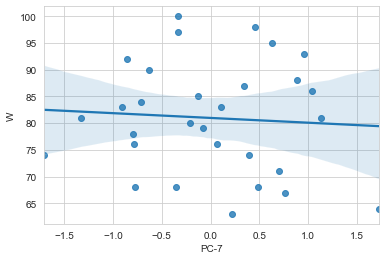

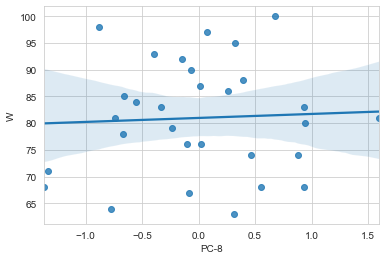

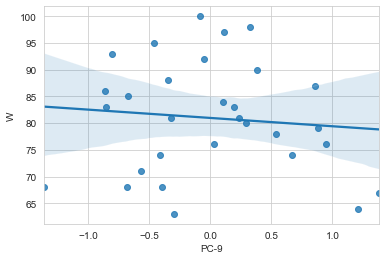

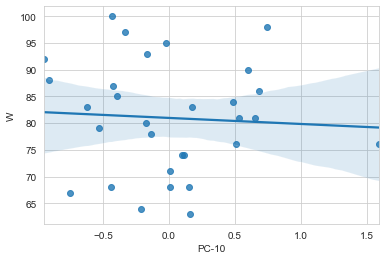

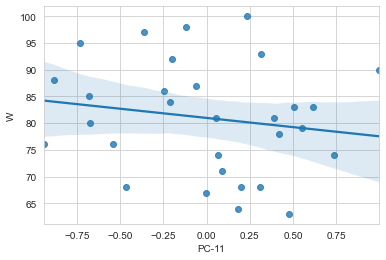

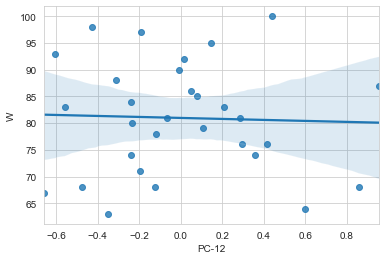

In [77]:
for col in bb_prnc_feat.columns:
    plt.figure()
    sns.regplot(x = col,y=y, data = bb_prnc_feat)

### MAJOR OBSERVAIONS-:
1. In EDA also we saw that for the output column i.e. 'W' (WINS), when compared with all the input variables the data are spreaded or diversified in each column. therefore, linear regression is not actually producing much better result.
2. what if we create classes for the output column and try with it.
    * output column 'W' has range from 63-100
    * lets make the classes out of it.
    * for less than 75, it will be low win, that means level 3.
    * for 76-85, it will be runners, that means level 2.
    * for greater than 85, it will be top-winners, that means level 1.
3. we have to drop ERA beacuse, it has very negative correlation with predictor.

In [78]:
bb = pd.read_csv('baseball.csv')

In [79]:
bb

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [80]:
bb = bb.drop('ERA', axis =1)

In [81]:
wins = []
for i in bb['W']:
    if i<=75:
        wins.append(3)
    elif 75<i<=85:
        wins.append(2)
    else:
        wins.append(1)
wins

[1,
 2,
 2,
 2,
 3,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 1,
 1,
 1,
 3,
 3,
 1,
 2,
 3,
 3,
 3,
 1,
 2,
 2,
 3,
 3]

In [82]:
bb['wins'] = wins
bb

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E,wins
0,95,724,5575,1497,300,42,139,383,973,104,641,601,2,8,56,88,1
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,2,12,45,86,2
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,11,10,38,79,2
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,7,9,37,101,2
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,7,12,35,86,3
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,7,10,34,88,1
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,3,4,48,93,1
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,0,10,43,77,2
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,1,12,60,95,2
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,3,10,40,97,2


* now we achieved classes for 'W' column, and we can go for classification models.
* we also can drop 'W' column for now

In [83]:
bb_new = bb.drop('W', axis =1)
bb_new

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E,wins
0,724,5575,1497,300,42,139,383,973,104,641,601,2,8,56,88,1
1,696,5467,1349,277,44,156,439,1264,70,700,653,2,12,45,86,2
2,669,5439,1395,303,29,141,533,1157,86,640,584,11,10,38,79,2
3,622,5533,1381,260,27,136,404,1231,68,701,643,7,9,37,101,2
4,689,5605,1515,289,49,151,455,1259,83,803,746,7,12,35,86,3
5,891,5509,1480,308,17,232,570,1151,88,670,609,7,10,34,88,1
6,764,5567,1397,272,19,212,554,1227,63,698,652,3,4,48,93,1
7,713,5485,1370,246,20,217,418,1331,44,693,646,0,10,43,77,2
8,644,5485,1383,278,32,167,436,1310,87,642,604,1,12,60,95,2
9,748,5640,1495,294,33,161,478,1148,71,753,694,3,10,40,97,2


<AxesSubplot:xlabel='wins', ylabel='count'>

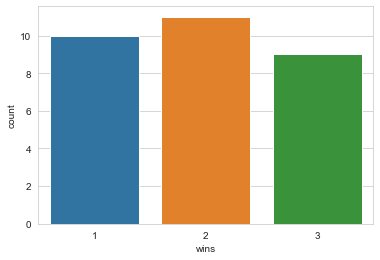

In [84]:
sns.countplot(bb_new['wins'])

### we have nearly balanced data alomost, so its good to go for classification problem.

In [85]:
X = bb_new.drop('wins', axis =1)
y = bb_new['wins']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [87]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [88]:
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()

In [89]:
models = [mnb, dtc, knn, svc]
for m in models:
    m.fit(X_train, y_train)
    print('model score:', m.score(X_train, y_train))
    pred_m = m.predict(X_test)
    print(f'{m} Model Reprot')
    print(classification_report(y_test,pred_m))
    print(confusion_matrix(y_test, pred_m))
    print('\n')

model score: 0.8571428571428571
MultinomialNB() Model Reprot
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       1.00      0.25      0.40         4
           3       0.50      1.00      0.67         2

    accuracy                           0.67         9
   macro avg       0.75      0.75      0.64         9
weighted avg       0.81      0.67      0.61         9

[[3 0 0]
 [1 1 2]
 [0 0 2]]


model score: 1.0
DecisionTreeClassifier() Model Reprot
              precision    recall  f1-score   support

           1       0.50      0.33      0.40         3
           2       0.33      0.25      0.29         4
           3       0.50      1.00      0.67         2

    accuracy                           0.44         9
   macro avg       0.44      0.53      0.45         9
weighted avg       0.43      0.44      0.41         9

[[1 2 0]
 [1 1 2]
 [0 0 2]]


model score: 0.6666666666666666
KNeighborsClassifier() Model R

In [90]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [91]:
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()

In [92]:
models2 = [rfc,abc,etc,gbc]
for m in models2:
    m.fit(X_train, y_train)
    print('model score:', m.score(X_train, y_train))
    pred_m = m.predict(X_test)
    print(f'{m} Model Reprot')
    print(classification_report(y_test,pred_m))
    print(confusion_matrix(y_test, pred_m))
    print('\n')

model score: 1.0
RandomForestClassifier() Model Reprot
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.67      0.50      0.57         4
           3       0.50      1.00      0.67         2

    accuracy                           0.67         9
   macro avg       0.72      0.72      0.68         9
weighted avg       0.74      0.67      0.67         9

[[2 1 0]
 [0 2 2]
 [0 0 2]]


model score: 0.7142857142857143
AdaBoostClassifier() Model Reprot
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.60      0.75      0.67         4
           3       0.50      0.50      0.50         2

    accuracy                           0.44         9
   macro avg       0.37      0.42      0.39         9
weighted avg       0.38      0.44      0.41         9

[[0 2 1]
 [1 3 0]
 [1 0 1]]


model score: 1.0
ExtraTreesClassifier() Model Reprot
    

# we will take 4 models out of 8 trained
* mnb
* rfc
* etc
* gbc

In [93]:
from sklearn.model_selection import GridSearchCV

In [99]:
mnb_param = {
    'alpha':[0.001,0.01,0.1,1,10,100],
    'fit_prior':[True, False]    
}

rfc_param = {
    'n_estimators':[10,100,300,500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,4,6,8,10],
    'min_samples_split': range(2,20,2),
    'min_samples_leaf': range(2,20,2),
}

gbc_param = {
    'loss': ['deviance', 'exponential'],
    'n_estimators': [100,300],
    'criterion':['friedman_mse', 'mse', 'mae'],
    'max_depth': range(2,10,2),
}

In [95]:
gdsrcv = GridSearchCV(estimator= mnb, param_grid= mnb_param )
gdsrcv.fit(X_train,y_train)
print('best estimator:', gdsrcv.best_estimator_)
print('best params:', gdsrcv.best_params_)
print('best score:', gdsrcv.best_score_)

best estimator: MultinomialNB(alpha=0.001)
best params: {'alpha': 0.001, 'fit_prior': True}
best score: 0.5700000000000001


In [96]:
gdsrcv = GridSearchCV(estimator= rfc, param_grid= rfc_param )
gdsrcv.fit(X_train,y_train)
print('best estimator:', gdsrcv.best_estimator_)
print('best params:', gdsrcv.best_params_)
print('best score:', gdsrcv.best_score_)

best estimator: RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=10)
best params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
best score: 0.67


In [100]:
gdsrcv = GridSearchCV(estimator= gbc, param_grid= gbc_param )
gdsrcv.fit(X_train,y_train)
print('best estimator:', gdsrcv.best_estimator_)
print('best params:', gdsrcv.best_params_)
print('best score:', gdsrcv.best_score_)

best estimator: GradientBoostingClassifier(criterion='mae', max_depth=2, n_estimators=300)
best params: {'criterion': 'mae', 'loss': 'deviance', 'max_depth': 2, 'n_estimators': 300}
best score: 0.43


### since we got the best score in Random Forest classifier, we train the model with best parameters

In [102]:
rfc = RandomForestClassifier(n_estimators=10, criterion='gini',max_depth=10, min_samples_leaf= 2, min_samples_split= 2)

In [103]:
rfc.fit(X_train, y_train)
print('model score:', rfc.score(X_train, y_train))
predrfc = rfc.predict(X_test)
print(f'{rfc} Model Reprot')
print(classification_report(y_test,predrfc))
print(confusion_matrix(y_test, predrfc))

model score: 1.0
RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=10) Model Reprot
              precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       1.00      0.25      0.40         4
           3       1.00      0.50      0.67         2

    accuracy                           0.56         9
   macro avg       0.81      0.58      0.56         9
weighted avg       0.81      0.56      0.53         9

[[3 0 0]
 [3 1 0]
 [1 0 1]]


In [104]:
rfc2 = RandomForestClassifier()
rfc2.fit(X_train, y_train)
print('model score:', rfc2.score(X_train, y_train))
predrfc2 = rfc2.predict(X_test)
print(f'{rfc2} Model Reprot')
print(classification_report(y_test,predrfc2))
print(confusion_matrix(y_test, predrfc2))

model score: 1.0
RandomForestClassifier() Model Reprot
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.67      0.50      0.57         4
           3       0.50      1.00      0.67         2

    accuracy                           0.67         9
   macro avg       0.72      0.72      0.68         9
weighted avg       0.74      0.67      0.67         9

[[2 1 0]
 [0 2 2]
 [0 0 2]]


## since the accuracy score is best with default parameters, we will choose this model.

# saving the model

In [106]:
import joblib

In [107]:
joblib.dump(rfc2,'rfc2file.obj')

['rfc2file.obj']